<a href="https://colab.research.google.com/github/ori98/PyProjects/blob/main/%F0%9F%91%85_Tongue_crack_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUSINESS CASE: Detecting cracks on tongue


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Going to the folder
!cd "/content/drive/MyDrive/Tooth Crack Detection ipynb"

/bin/bash: line 1: cd: /content/drive/MyDrive/Tooth Crack Detection ipynb: No such file or directory


## Loading up Kaggle dataset

In [13]:
# loading up the kaggle library
!pip install kaggle

In [14]:
!mkdir ~/.kaggle

In [15]:
!cp /content/drive/MyDrive/Kaggle_credentials/kaggle_new.json ~/.kaggle/kaggle.json

Change permission to the owner for read and write:

In [16]:
!chmod 600 ~/.kaggle/kaggle.json

In [17]:
! kaggle datasets download arunrk7/surface-crack-detection

 96% 223M/233M [00:03<00:00, 99.0MB/s]
100% 233M/233M [00:03<00:00, 75.5MB/s]


In [18]:
! unzip surface-crack-detection

Streaming output truncated to the last 5000 lines.
  inflating: Positive/15001_1.jpg    
  inflating: Positive/15002_1.jpg    
  inflating: Positive/15003_1.jpg    
  inflating: Positive/15004_1.jpg    
  inflating: Positive/15005_1.jpg    
  inflating: Positive/15006_1.jpg    
  inflating: Positive/15007_1.jpg    
  inflating: Positive/15008_1.jpg    
  inflating: Positive/15009_1.jpg    
  inflating: Positive/15010_1.jpg    
  inflating: Positive/15011_1.jpg    
  inflating: Positive/15012_1.jpg    
  inflating: Positive/15013_1.jpg    
  inflating: Positive/15014_1.jpg    
  inflating: Positive/15015_1.jpg    
  inflating: Positive/15016_1.jpg    
  inflating: Positive/15017_1.jpg    
  inflating: Positive/15018_1.jpg    
  inflating: Positive/15019_1.jpg    
  inflating: Positive/15020_1.jpg    
  inflating: Positive/15021_1.jpg    
  inflating: Positive/15022_1.jpg    
  inflating: Positive/15023_1.jpg    
  inflating: Positive/15024_1.jpg    
  inflating: Positive/15025_1.jpg    

# PYTHON IMPLIMENTATION

### IMPORTING NECESSARY LIBRARY

In [2]:
!nvidia-smi

Fri Oct 13 19:58:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# importing missing libraries
#!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 9.0 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Lambda, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import regularizers
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import visualkeras
from glob import glob
import numpy as np
import cv2
import os


# Used to supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [19]:
cd Tongue\ Crack\ Detection\ mdoel

/content/drive/MyDrive/Tongue Crack Detection mdoel


### DATA LOADING PREPARATION AND VISUALISATION

In [20]:
folder_path = r"/content/drive/MyDrive/Tongue Crack Detection mdoel/"
no_images = os.listdir("Negative")[:1000]
yes_images = os.listdir("Positive")[:1000]

dataset = []
label = []

for image_name in no_images:
    image = cv2.imread(folder_path + '/Negative/' + image_name)
    image = Image.fromarray(image)
    image = image.resize((240,240))
    dataset.append(np.array(image))
    label.append(0)


for image_name in yes_images:
    image = cv2.imread(folder_path + '/Positive/' + image_name)
    image = Image.fromarray(image)
    image = image.resize((240,240))
    dataset.append(np.array(image))
    label.append(1)


dataset = np.array(dataset)
label = np.array(label)
print('Dataset Shape:',dataset.shape,'Label Shape:',label.shape)

Dataset Shape: (2000, 240, 240, 3) Label Shape: (2000,)


### SPLIT DATA INTO TRAINING AND TESTING

In [21]:
X_train,X_test,y_train,y_test = train_test_split(dataset,label, test_size=0.2,shuffle=True, random_state=42)

In [22]:
X_train.shape

(1600, 240, 240, 3)

In [23]:
X_test.shape

(400, 240, 240, 3)

In [24]:
# Rescale the image by dividing every pixel of image by 255

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print("X_train",X_train.shape)
print("X_train samples",X_train.shape[0]) # 0 is index no
print("X_test",X_test.shape[0]) # 0 is index no

X_train (1600, 240, 240, 3)
X_train samples 1600
X_test 400


### VISUALISE BOTH CLASSES IMAGES WITH THE HELP OF OPEN-CV

In [25]:
no = os.listdir(r"/content/drive/MyDrive/Tongue Crack Detection mdoel/Negative")
print(no[:6])
yes = os.listdir(r"/content/drive/MyDrive/Tongue Crack Detection mdoel/Positive")
print(yes[:6])

['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg']
['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg']


## Negative Images

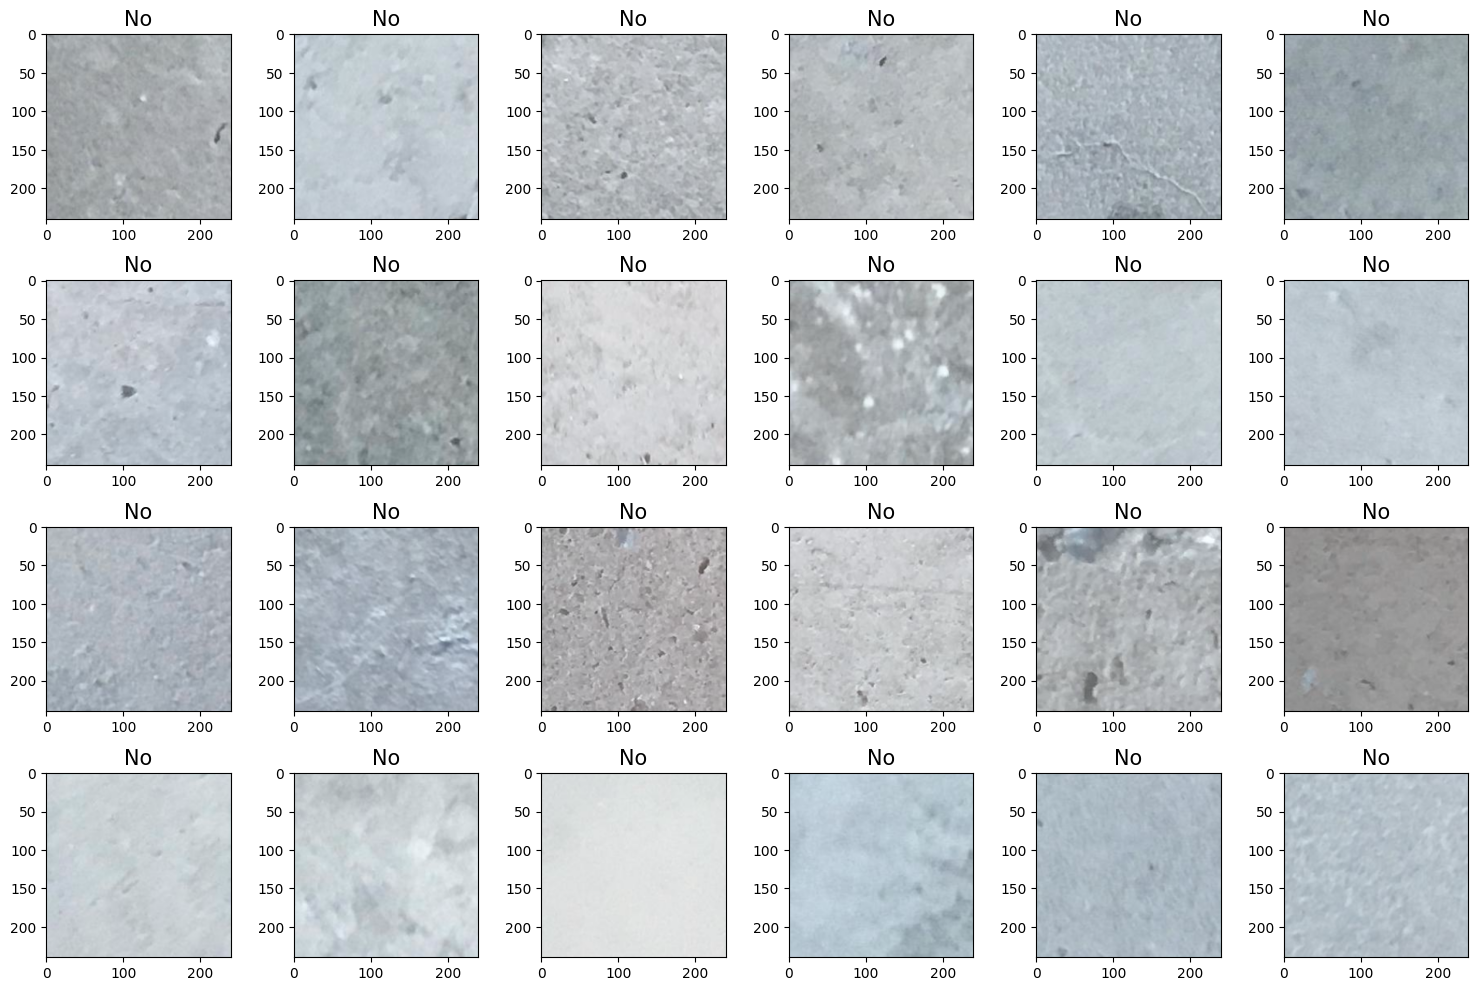

In [26]:
plt.figure(figsize=(15,10), facecolor='white')
for i in range(24):
    plt.subplot(4,6,i+1)
    img = cv2.imread(r"/content/drive/MyDrive/Tongue Crack Detection mdoel/Negative" + '/' + no[i])
    resize_img = cv2.resize(img,(240,240))
    plt.imshow(resize_img)
    plt.title("No",fontsize=15)
plt.tight_layout()

## Positive Images

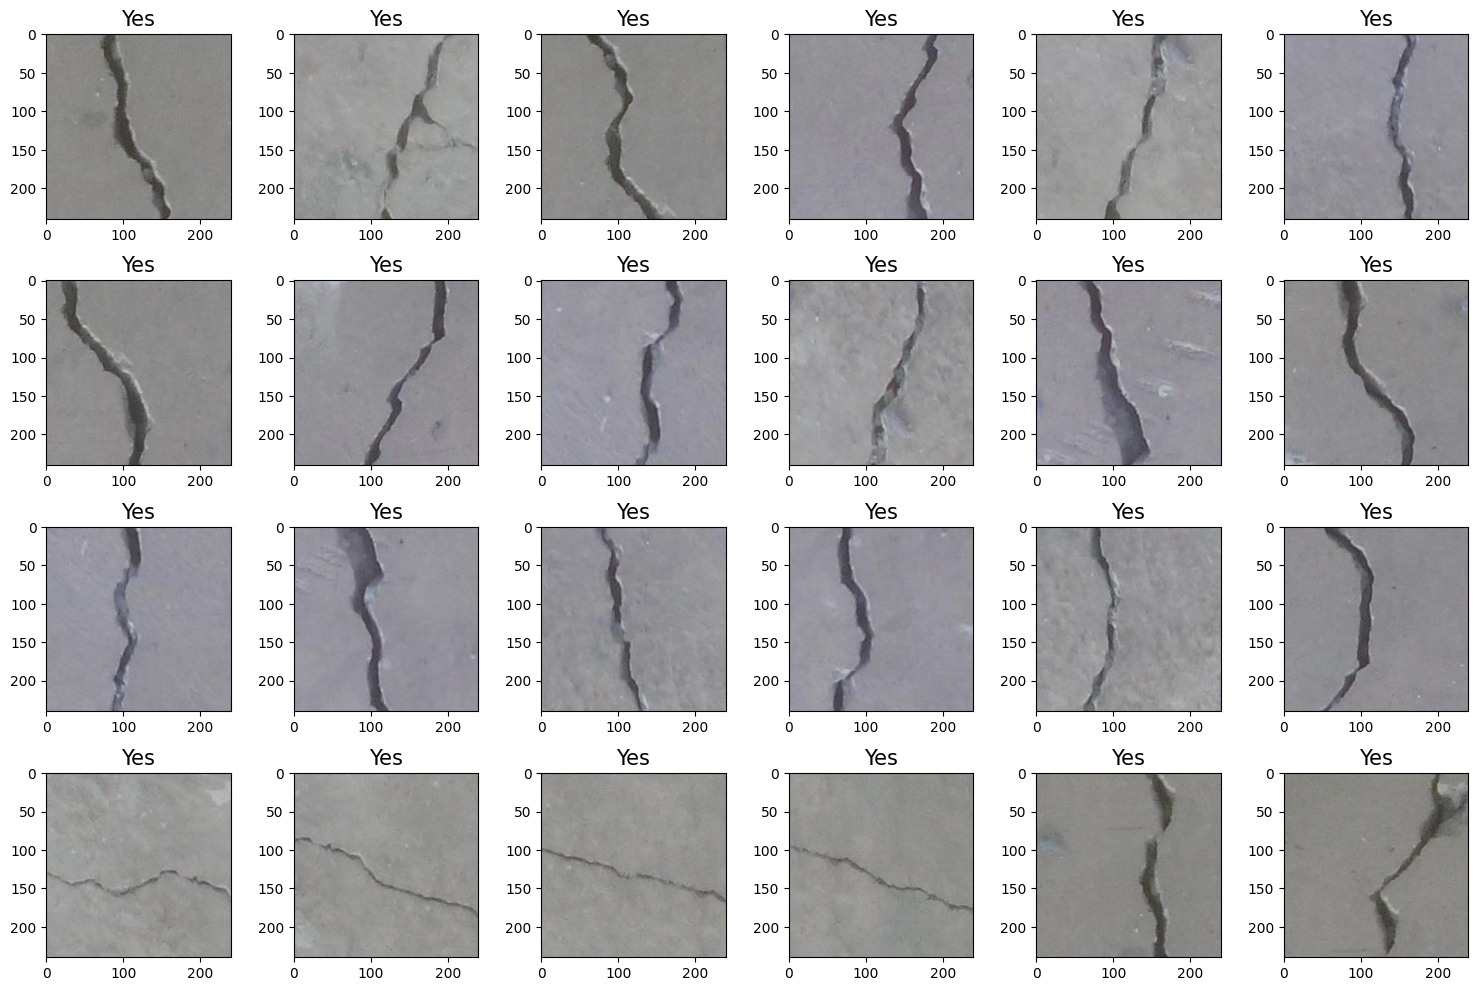

In [29]:
plt.figure(figsize=(15,10))
for j in range(24):
    plt.subplot(4,6,j+1)
    img = cv2.imread(r"/content/drive/MyDrive/Tongue Crack Detection mdoel/Positive" +  '/' + yes[j])
    resize = cv2.resize(img, (240,240))
    plt.imshow(resize)
    plt.title("Yes",fontsize=15)
plt.tight_layout()


### BUILD CNN ARCHITECTURE

In [30]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid",input_shape=(240,240,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid"),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-3),
                          bias_regularizer=regularizers.L2(1e-2),
                          activity_regularizer=regularizers.L2(1e-3)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 119, 119, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                4

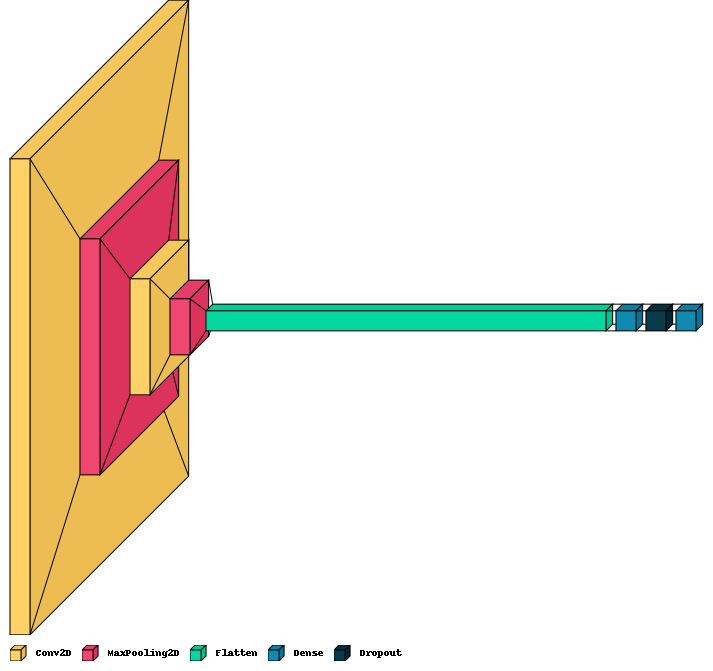

In [32]:
visualkeras.layered_view(model, legend=True)

### COMPILE & TRAIN MODEL

In [33]:
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [34]:
# Compute the class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
class_weights = dict(zip(np.unique(y_train),class_weights))
class_weights

{0: 0.9987515605493134, 1: 1.0012515644555695}

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint(filepath='cnn_model.hdf5', save_best_only=True, monitor='val_loss',verbose=1)

history = model.fit(X_train,y_train, epochs=80,
                    class_weight=class_weights,
                    validation_data=(X_test,y_test),
                    verbose=1,callbacks=callback)

Epoch 1/80
48/50 [===========================>..] - ETA: 0s - loss: 2.5755 - accuracy: 0.5417
Epoch 1: val_loss improved from inf to 0.90541, saving model to cnn_model.hdf5
50/50 [==============================] - 14s 49ms/step - loss: 2.5096 - accuracy: 0.5394 - val_loss: 0.9054 - val_accuracy: 0.5025
Epoch 2/80
48/50 [===========================>..] - ETA: 0s - loss: 0.7826 - accuracy: 0.5710
Epoch 2: val_loss improved from 0.90541 to 0.70832, saving model to cnn_model.hdf5
50/50 [==============================] - 1s 25ms/step - loss: 0.7795 - accuracy: 0.5800 - val_loss: 0.7083 - val_accuracy: 0.8450
Epoch 3/80
49/50 [============================>.] - ETA: 0s - loss: 0.6406 - accuracy: 0.7761
Epoch 3: val_loss improved from 0.70832 to 0.64424, saving model to cnn_model.hdf5
50/50 [==============================] - 1s 27ms/step - loss: 0.6378 - accuracy: 0.7769 - val_loss: 0.6442 - val_accuracy: 0.7300
Epoch 4/80
49/50 [============================>.] - ETA: 0s - loss: 0.4952 - accur

### PLOTTING TRAINING AND VALIDATION LOSS & ACCURACY

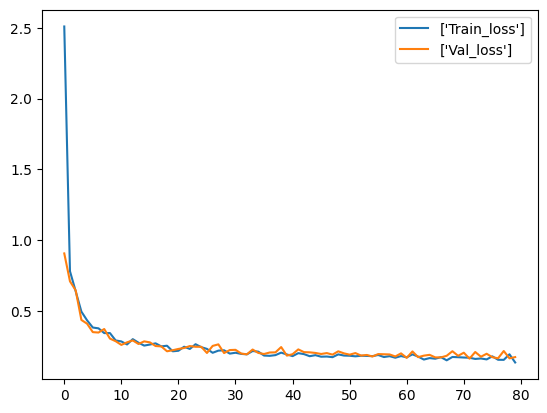

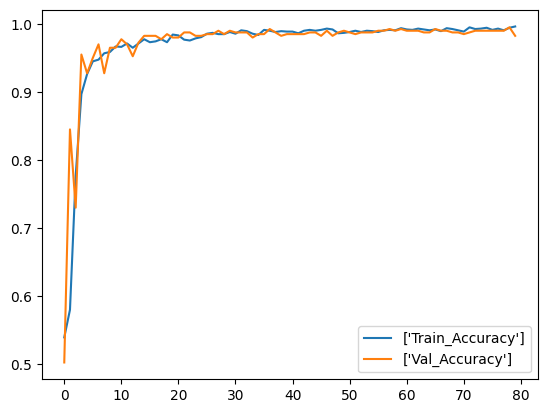

In [36]:
plt.plot(history.history['loss'],label=['Train_loss'])
plt.plot(history.history['val_loss'],label=['Val_loss'])
plt.legend()
plt.show()

plt.plot(history.history['accuracy'],label=['Train_Accuracy'])
plt.plot(history.history['val_accuracy'],label=['Val_Accuracy'])
plt.legend()
plt.show()

### MODEL EVALUATION

In [37]:
result = model.evaluate(X_test,y_test)
print("The Current Model Achived An Accuracy Of {}%".format(round(result[1]*100,2)))

13/13 [==============================] - 0s 15ms/step - loss: 0.1726 - accuracy: 0.9825
The Current Model Achived An Accuracy Of 98.25%


### USE VGG19 TO GET BETTER RESULT

In [38]:
image_size = [240,240]
vgg = VGG19(input_shape=image_size + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [39]:
# Freeze the existing layer
for layer in vgg.layers:
    layer.trainable=False

In [40]:
# Adding more layers
x = Flatten()(vgg.output)
x = Dense(units=64, activation='relu',
        kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-3),
        bias_regularizer=regularizers.L2(1e-2),
        activity_regularizer=regularizers.L2(1e-3))(x)
prediction = Dense(1, activation='sigmoid')(x)
vgg_model = Model(vgg.input, outputs=prediction)

In [41]:
# Visualise the model summary
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0     

### VISUALISE THE MODEL

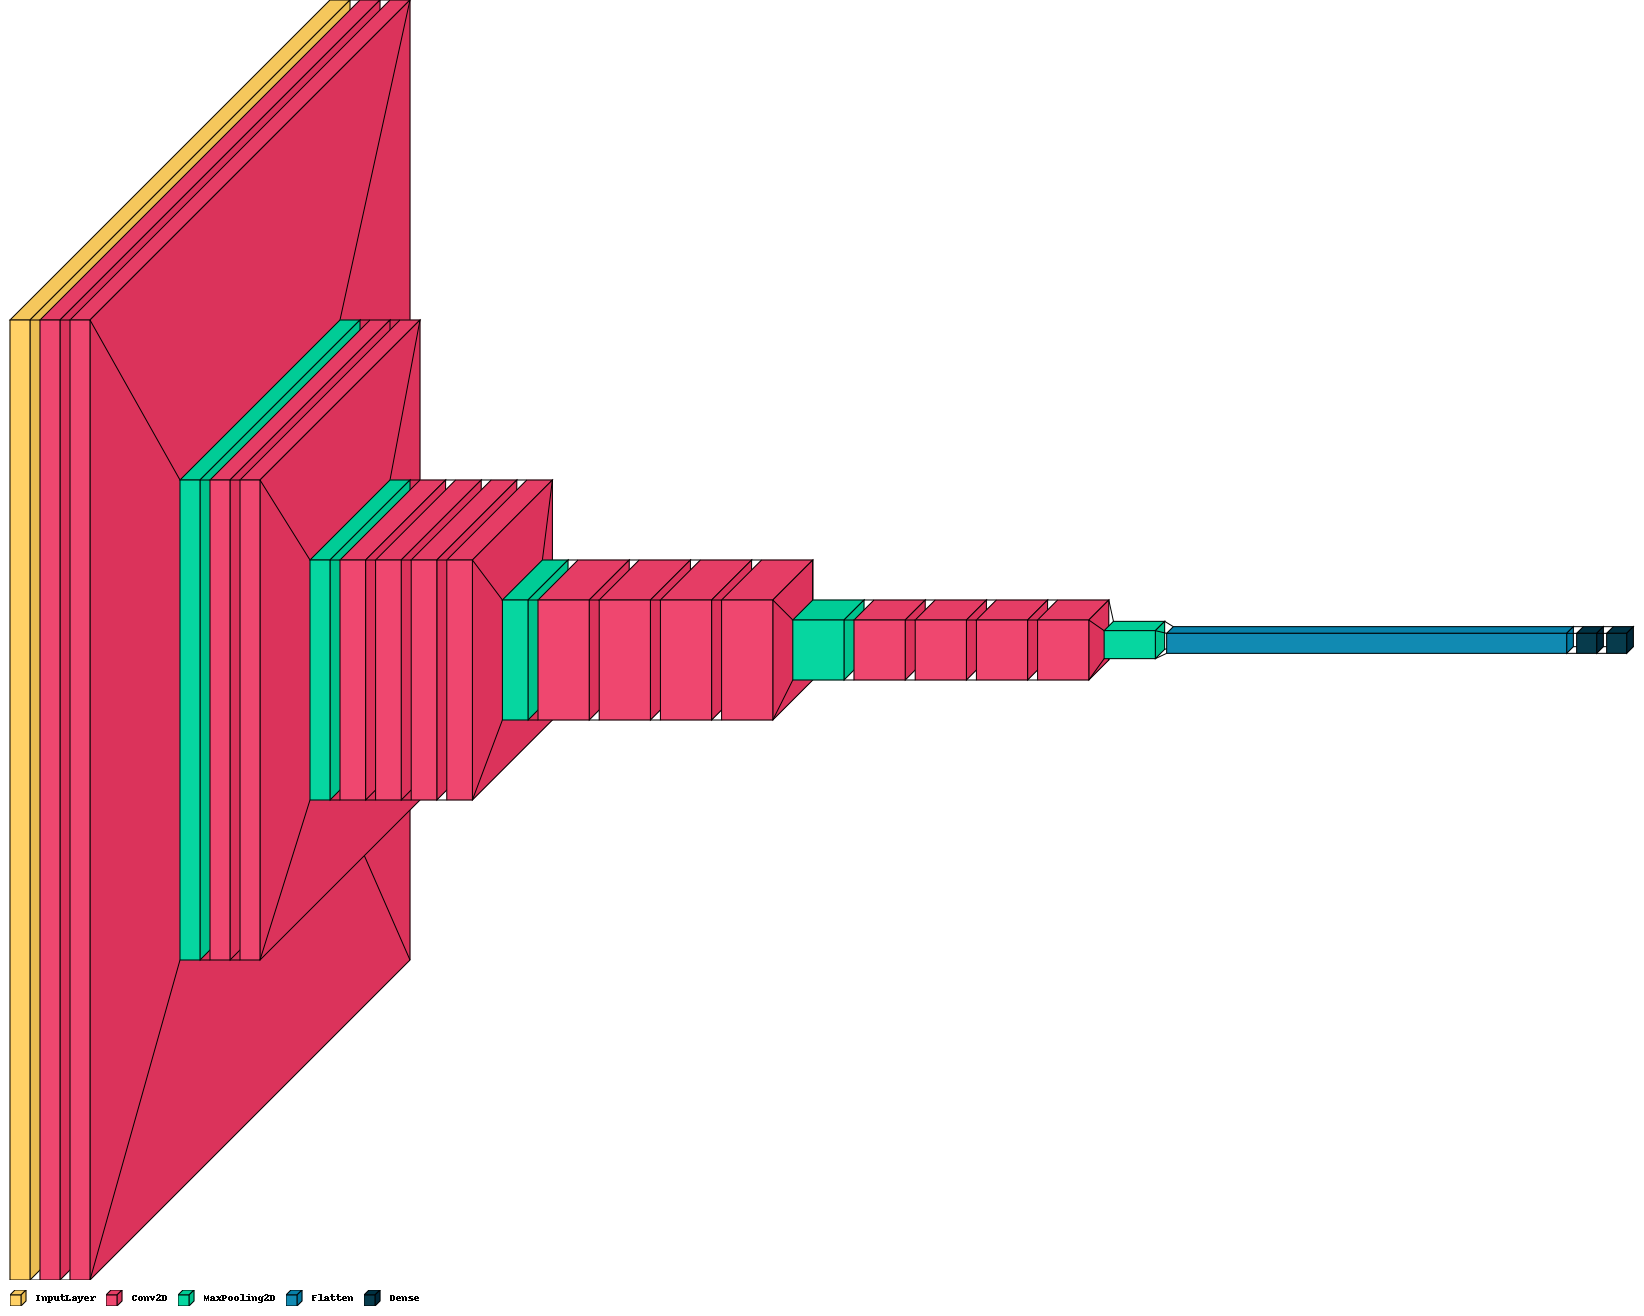

In [42]:
visualkeras.layered_view(vgg_model, legend=True)

### COMPILE & TRAIN MODEL

In [43]:
vgg_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
# Fit model for training
history = vgg_model.fit(X_train,y_train, epochs=60,
             class_weight=class_weights,
             validation_data=(X_test,y_test),
             verbose=1)

Epoch 1/60
50/50 [==============================] - 21s 289ms/step - loss: 3.9274 - accuracy: 0.8050 - val_loss: 1.2947 - val_accuracy: 0.9750
Epoch 2/60
50/50 [==============================] - 11s 221ms/step - loss: 0.9332 - accuracy: 0.9850 - val_loss: 0.7097 - val_accuracy: 0.9825
Epoch 3/60
50/50 [==============================] - 11s 214ms/step - loss: 0.6266 - accuracy: 0.9862 - val_loss: 0.5605 - val_accuracy: 0.9800
Epoch 4/60
50/50 [==============================] - 11s 226ms/step - loss: 0.5112 - accuracy: 0.9919 - val_loss: 0.4947 - val_accuracy: 0.9825
Epoch 5/60
50/50 [==============================] - 11s 227ms/step - loss: 0.4746 - accuracy: 0.9900 - val_loss: 0.4517 - val_accuracy: 0.9800
Epoch 6/60
50/50 [==============================] - 11s 228ms/step - loss: 0.4349 - accuracy: 0.9887 - val_loss: 0.4221 - val_accuracy: 0.9825
Epoch 7/60
50/50 [==============================] - 12s 232ms/step - loss: 0.4009 - accuracy: 0.9944 - val_loss: 0.3948 - val_accuracy: 0.9800

### PLOTTING TRAINING, VALIDATION ACCURACY AS WELL AS LOSS

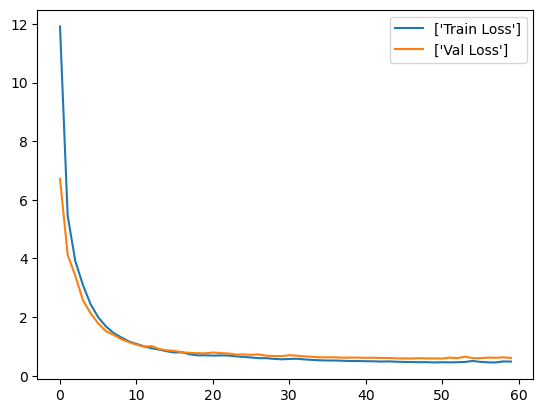

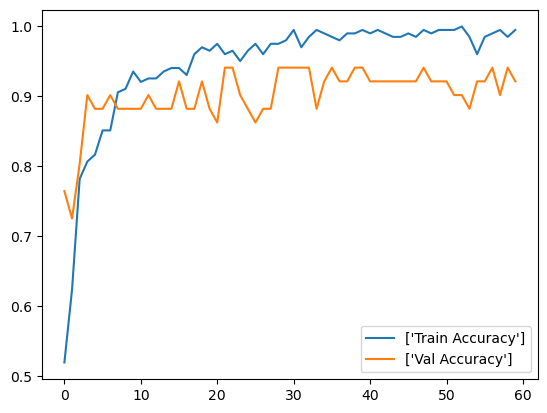

In [ ]:
plt.plot(history.history['loss'], label=["Train Loss"])
plt.plot(history.history['val_loss'],label=['Val Loss'])
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label=["Train Accuracy"])
plt.plot(history.history['val_accuracy'],label=['Val Accuracy'])
plt.legend()
plt.show()

### MODEL SAVING

In [45]:
vgg_model.save('VGG19_Model.h5')

### MODEL EVALUATION

In [46]:
result = vgg_model.evaluate(X_test,y_test)
print("Result of VGG19 Model {}%".format(round(result[1]*100,2)))

13/13 [==============================] - 2s 165ms/step - loss: 0.2703 - accuracy: 0.9900
Result of VGG19 Model 99.0%


In [47]:
predictions = vgg_model.predict(X_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

13/13 [==============================] - 2s 174ms/step


In [48]:
print(y_pred)

[1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 